In [20]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = load_digits()

In [3]:
dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
len(dataset.data)

1797

In [6]:
dataset.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [8]:
dataset.data[0].shape

(64,)

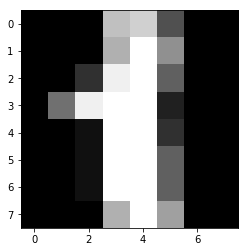

In [14]:
plt.imshow(dataset.data[1].reshape(8,8), cmap='gist_gray')

In [15]:
X = dataset.data
y = dataset.target

In [16]:
X.shape,y.shape

((1797, 64), (1797,))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [22]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM', SVC()))

In [25]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.931530 (0.035010)
DT: 0.825779 (0.043964)
NB: 0.882011 (0.053765)
KNN: 0.973849 (0.018272)
SVM: 0.465270 (0.053040)
